## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [2]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


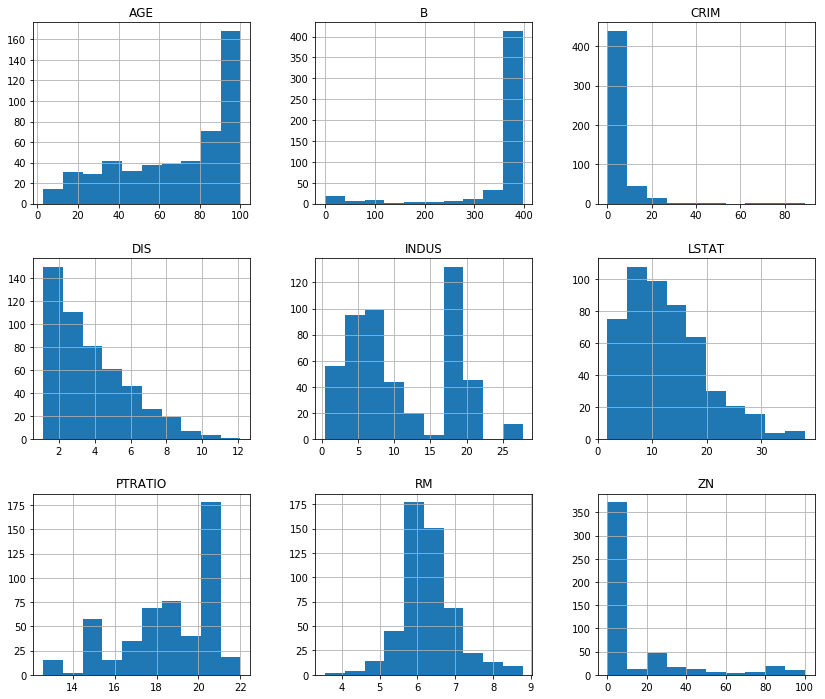

In [6]:
boston_features.hist(['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], figsize=(14,12));

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [14]:
import numpy as np
log_data = pd.DataFrame([])
log_data['logAge'] = np.log(boston_features['AGE'])
log_data['logB'] = np.log(boston_features['B'])
log_data['logCrim'] = np.log(boston_features['CRIM'])
log_data['logDis'] = np.log(boston_features['DIS'])
log_data['logIndus'] = np.log(boston_features['INDUS'])
log_data['logLstat'] = np.log(boston_features['LSTAT'])
log_data['logPtratio'] = np.log(boston_features['PTRATIO'])
log_data['logZn'] = np.log(boston_features['ZN'])


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [10]:
log_data['logZn'].value_counts()

-inf         372
 2.995732     21
 4.382027     15
 3.218876     10
 2.525729     10
 3.091042     10
 3.688879      7
 3.401197      6
 3.806662      6
 4.499810      5
 3.044522      4
 4.553877      4
 4.094345      4
 3.496508      4
 4.007333      3
 3.555348      3
 3.526361      3
 4.317488      3
 4.248495      3
 3.332205      3
 3.960813      3
 4.412798      2
 4.442651      2
 4.605170      1
 2.862201      1
 2.890372      1
Name: logZn, dtype: int64

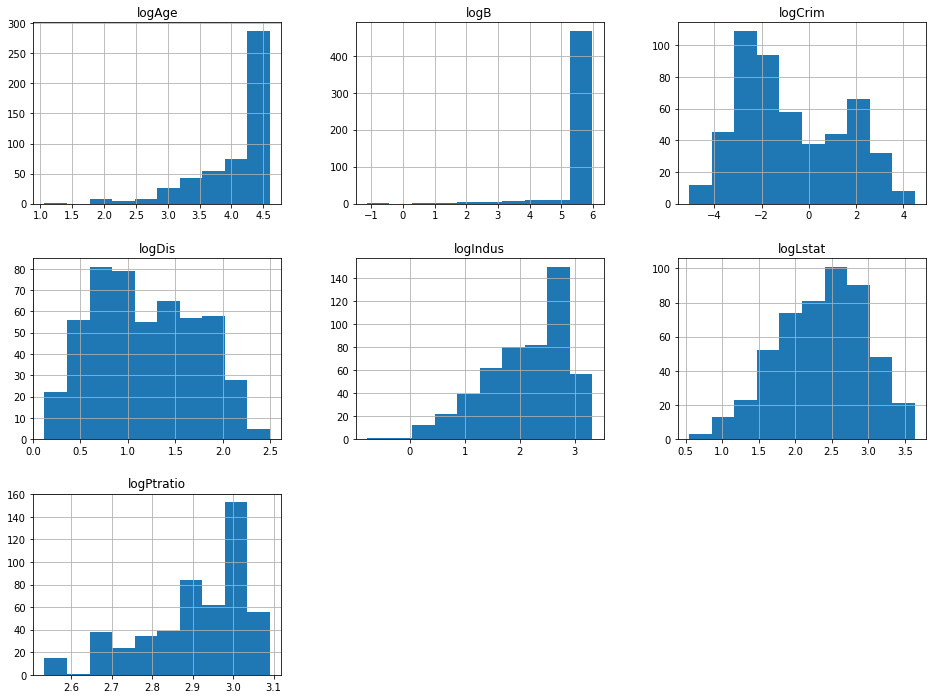

In [15]:
log_data.iloc[:,:-1].hist(figsize=(16,12));

Age, B, and Lstat did not improve
Crim, Dis, Indus, and Ptratio all improved, some drastically
ZN couldn't be histogrammed because doing the log made the 0's into -Inf values which threw an error upon plotting

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [16]:
log_data.head()

,logAge,logB,logCrim,logDis,logIndus,logLstat,logPtratio,logZn
0,4.177459,5.983684,-5.064036,1.408545,0.837248,1.605430,2.727853,2.890372
1,4.368181,5.983684,-3.600502,1.602836,1.955860,2.212660,2.879198,-inf
2,4.112512,5.973377,-3.601235,1.602836,1.955860,1.393766,2.879198,-inf
3,3.824284,5.977949,-3.430523,1.802073,0.779325,1.078410,2.928524,-inf
4,3.992681,5.983684,-2.672924,1.802073,0.779325,1.673351,2.928524,-inf


In [17]:
logAge = log_data['logAge']
logB = log_data['logB']
logCrim = log_data['logCrim']
logDis = log_data['logDis']
logIndus = log_data['logIndus']
logLstat = log_data['logLstat']
logPt = log_data['logPtratio']
rm = boston_features['RM']

In [18]:
from sklearn import preprocessing

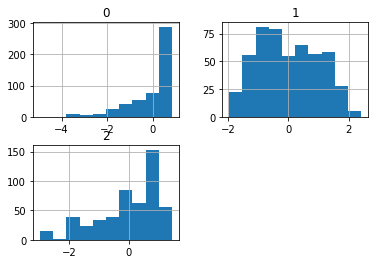

In [22]:
std_scale = preprocessing.StandardScaler().fit(log_data[['logAge', 'logDis', 'logPtratio']])
df_std = std_scale.transform(log_data[['logAge', 'logDis', 'logPtratio']])
pd.DataFrame(df_std).hist();

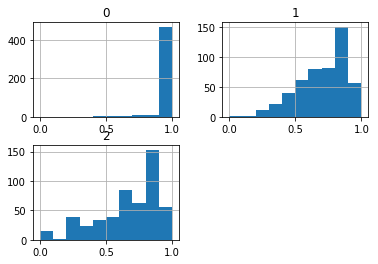

In [23]:
minmax_scale = preprocessing.MinMaxScaler().fit(log_data[['logB', 'logIndus', 'logPtratio']])
df_minmax = minmax_scale.transform(log_data[['logB', 'logIndus', 'logPtratio']])
pd.DataFrame(df_minmax).hist();

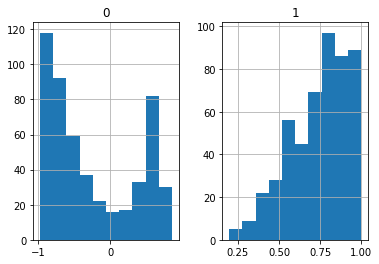

In [25]:
norm_scale = preprocessing.Normalizer().fit(log_data[['logCrim', 'logLstat']])
df_norm = norm_scale.transform(log_data[['logCrim', 'logLstat']])
pd.DataFrame(df_norm).hist();

In [30]:
df_std = pd.DataFrame(df_std)
df_std.columns = ['log_std_Age', 'log_std_Dis', 'log_std_Ptratio']
df_std.head()

,log_std_Age,log_std_Dis,log_std_Ptratio
0,0.142028,0.409104,-1.443977
1,0.454617,0.769562,-0.230278
2,0.035581,0.769562,-0.230278
3,-0.436818,1.139194,0.165279
4,-0.160820,1.139194,0.165279


In [31]:
df_minmax = pd.DataFrame(df_minmax)
df_minmax.columns = ['log_mm_B', 'log_mm_Dis', 'log_mm_Ptratio']
df_minmax.head()

,log_mm_B,log_mm_Dis,log_mm_Ptratio
0,1.000000,0.393661,0.348358
1,1.000000,0.666533,0.619906
2,0.998553,0.666533,0.619906
3,0.999195,0.379532,0.708405
4,1.000000,0.379532,0.708405


In [32]:
df_norm = pd.DataFrame(df_norm)
df_norm.columns = ['log_norm_Crim', 'log_norm_Lstat']
df_norm.head()

,log_norm_Crim,log_norm_Lstat
0,-0.953244,0.302203
1,-0.851979,0.523577
2,-0.932591,0.360936
3,-0.953974,0.299889
4,-0.847603,0.530631


In [34]:
features_final = pd.DataFrame([])
features_final = pd.concat([features_final, df_std, df_minmax, df_norm], axis=1)
features_final.head()

,log_std_Age,log_std_Dis,log_std_Ptratio,log_mm_B,log_mm_Dis,log_mm_Ptratio,log_norm_Crim,log_norm_Lstat
0,0.142028,0.409104,-1.443977,1.000000,0.393661,0.348358,-0.953244,0.302203
1,0.454617,0.769562,-0.230278,1.000000,0.666533,0.619906,-0.851979,0.523577
2,0.035581,0.769562,-0.230278,0.998553,0.666533,0.619906,-0.932591,0.360936
3,-0.436818,1.139194,0.165279,0.999195,0.379532,0.708405,-0.953974,0.299889
4,-0.160820,1.139194,0.165279,1.000000,0.379532,0.708405,-0.847603,0.530631


In [35]:
scaled_rm = (rm-np.mean(rm))/(max(rm)-min(rm))
features_final['mn_Rm'] = scaled_rm

In [36]:
features_final.head()

,log_std_Age,log_std_Dis,log_std_Ptratio,log_mm_B,log_mm_Dis,log_mm_Ptratio,log_norm_Crim,log_norm_Lstat,mn_Rm
0,0.142028,0.409104,-1.443977,1.000000,0.393661,0.348358,-0.953244,0.302203,0.055636
1,0.454617,0.769562,-0.230278,1.000000,0.666533,0.619906,-0.851979,0.523577,0.026129
2,0.035581,0.769562,-0.230278,0.998553,0.666533,0.619906,-0.932591,0.360936,0.172517
3,-0.436818,1.139194,0.165279,0.999195,0.379532,0.708405,-0.953974,0.299889,0.136686
4,-0.160820,1.139194,0.165279,1.000000,0.379532,0.708405,-0.847603,0.530631,0.165236


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.